In [53]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manim
from skimage.measure import find_contours
import pylidc as pyl
from pylidc.utils import consensus
import SimpleITK as sitk
from radiomics import featureextractor

In [54]:
#para percorrer todos os pacientes no banco de dados PyLIDC

subtlety=[]
internalStructure=[]
calcification=[]
sphericity=[]
margin=[]
lobulation=[]
spiculation=[]
texture=[]
malignancy=[]
nodulo_id=[]

nod_id=-1

for scan in pyl.query(pyl.Scan):
    
    nods = scan.cluster_annotations()
    
    if nods:
        for nod in nods:
            nod_id+=1
            
            anns_subtlety=0
            anns_Structure=0
            anns_calcification=0
            anns_sphericity=0
            anns_margin=0
            anns_lobulation=0
            anns_spiculation=0
            anns_texture=0
            anns_malignancy=0
            
            for anns in nod:
                anns_subtlety+=anns.subtlety
                anns_Structure+=anns.internalStructure
                anns_calcification+=anns.calcification
                anns_sphericity+=anns.sphericity
                anns_margin+=anns.margin
                anns_lobulation+=anns.lobulation
                anns_spiculation+=anns.spiculation
                anns_texture+=anns.texture
                anns_malignancy+=anns.malignancy
            
            
            num_ann=len(nod) 
            subtlety.append(anns_subtlety/num_ann)
            internalStructure.append(anns_Structure/num_ann)
            calcification.append(anns_calcification/num_ann)
            sphericity.append(anns_sphericity/num_ann)
            margin.append(anns_margin/num_ann)
            lobulation.append(anns_lobulation/num_ann)
            spiculation.append(anns_spiculation/num_ann)
            texture.append(anns_texture/num_ann)
            malignancy.append(anns_malignancy/num_ann)
            nodulo_id.append(nod_id)
        
    else:
        pass
        

        
#criar o DataFrame
data={'Nodulo_id':nodulo_id,'Sutlety':subtlety,'Internal_Structure':internalStructure,'Calcification':calcification,'Sphericity':sphericity,'Margin':margin,'Lobulation':lobulation,'Spiculation':spiculation,'Texture':texture,'Malignancy':malignancy}
df=pd.DataFrame(data)
            
            
        
        
        
        
    

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

In [55]:
# Criar uma lista para armazenar os IDs do paciente
patient_ids = []

nod_id = -1

for scan in pyl.query(pyl.Scan):
    
    nods = scan.cluster_annotations()
    
    if nods:
        for nod in nods:
            nod_id += 1
            
            # Se você tem o ID do paciente disponível em scan.patient_id:
            patient_id = scan.patient_id
            
            anns_subtlety = 0
            anns_Structure = 0
            # Resto do seu código...
            
            patient_ids.append(patient_id)  # Adicione o ID do paciente à lista
df.insert(1, 'PatientID', patient_ids)

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

In [56]:
df

,Nodulo_id,PatientID,Sutlety,Internal_Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Malignancy
0,0,LIDC-IDRI-0078,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,3.75
1,1,LIDC-IDRI-0078,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,3.75
2,2,LIDC-IDRI-0078,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,1.00
3,3,LIDC-IDRI-0078,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,4.25
4,4,LIDC-IDRI-0069,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,3.25
...,...,...,...,...,...,...,...,...,...,...,...
2646,2646,LIDC-IDRI-0639,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,4.00
2647,2647,LIDC-IDRI-0639,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,3.50
2648,2648,LIDC-IDRI-0638,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,3.50
2649,2649,LIDC-IDRI-0638,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,2.00


In [57]:
conditions = [
    (df['Malignancy'] >= 3.5),
    (df['Malignancy'] < 2.5),
    (df['Malignancy'] >= 2.5) & (df['Malignancy'] < 3.5)
]

choices = ['Yes', 'No', 'Indeterminate']

df['Target'] = np.select(conditions, choices, default='')
df

,Nodulo_id,PatientID,Sutlety,Internal_Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,Malignancy,Target
0,0,LIDC-IDRI-0078,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,3.75,Yes
1,1,LIDC-IDRI-0078,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,3.75,Yes
2,2,LIDC-IDRI-0078,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,1.00,No
3,3,LIDC-IDRI-0078,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,4.25,Yes
4,4,LIDC-IDRI-0069,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,3.25,Indeterminate
...,...,...,...,...,...,...,...,...,...,...,...,...
2646,2646,LIDC-IDRI-0639,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,4.00,Yes
2647,2647,LIDC-IDRI-0639,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,3.50,Yes
2648,2648,LIDC-IDRI-0638,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,3.50,Yes
2649,2649,LIDC-IDRI-0638,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,2.00,No


In [58]:
import pylidc as pl
# Configurar o extrator de características do PyRadiomics sem o arquivo params.yaml
extractor = featureextractor.RadiomicsFeatureExtractor()

# Consultar todas as varreduras com anotações
scans_with_annotations = pl.query(pl.Scan).filter(pl.Scan.annotations.any()).all()

# Lista para armazenar as características
features_list = []

# Lista para armazenar o ID do paciente correspondente a cada nódulo
patient_ids = []

# Variável para criar IDs únicos para os nódulos
nodule_id_counter = 0

# Iterar através de todas as varreduras com anotações
for scan in scans_with_annotations:
    # Obter o ID do paciente
    patient_id = scan.patient_id
   
    # Clusterize as anotações para a varredura e pegue todas
    nods = scan.cluster_annotations()
   
    # Iterar através de todos os nódulos do paciente
    for anns in nods:
        # Realize a consolidação de consenso e nível de acordo de 50%
        cmask, cbbox, masks = consensus(anns, clevel=0.5, pad=[(20, 20), (20, 20), (0, 0)])
       
        # Converter a matriz de pixels para uma imagem SimpleITK
        image = sitk.GetImageFromArray(cmask.astype(float))
       
        # Extrair características radiômicas usando PyRadiomics
        features = extractor.execute(image, image, label=1)  # Usar rótulo 1 para o nódulo
       
        # Adicionar o ID do paciente à lista
        patient_ids.append(patient_id)
       
        # Adicionar um ID único para o nódulo
        features['Nodulo_id'] = nodule_id_counter
        nodule_id_counter += 1
       
        # Adicionar as características à lista
        features_list.append(features)

# Converter a lista de características em um DataFrame do pandas
features_df = pd.DataFrame(features_list)

# Selecionar apenas as características desejadas
selected_features = features_df[['Nodulo_id',
                                 'Patient_id',
                                 'original_shape_Elongation',
                                 'original_shape_Sphericity',
                                 'original_shape_VoxelVolume',
                                 'original_shape_SurfaceArea',
                                 'original_shape_Maximum2DDiameterSlice',
                                 'original_firstorder_Entropy',
                                 'original_firstorder_Energy',
                                 'original_glrlm_LongRunEmphasis',
                                 'original_glrlm_ShortRunEmphasis']]

# Salvar as características selecionadas em um arquivo CSV
selected_features.to_csv('selected_radiomics_features3.csv', index=False)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

KeyError: "['Patient_id'] not in index"

In [59]:
features = pd.read_csv('selected_radiomics_features3.csv')

In [60]:
features

,Nodulo_id,original_shape_Elongation,original_shape_Sphericity,original_shape_VoxelVolume,original_shape_SurfaceArea,original_shape_Maximum2DDiameterSlice,original_firstorder_Entropy,original_firstorder_Energy,original_glrlm_LongRunEmphasis,original_glrlm_ShortRunEmphasis
0,0,0.848594,0.546513,1903.0,1345.323632,26.000000,-3.203427e-16,1903.0,65.445460,0.244577
1,1,0.845360,0.560402,1741.0,1237.565131,23.021729,-3.203427e-16,1741.0,66.218881,0.213370
2,2,0.879310,0.721639,34.0,63.678640,5.099020,-3.203427e-16,34.0,5.249011,0.595154
3,3,0.956858,0.547252,3646.0,2079.849951,35.227830,-3.203427e-16,3646.0,102.968159,0.163406
4,4,0.779886,0.660676,521.0,465.127969,12.041595,-3.203427e-16,521.0,21.648012,0.288292
...,...,...,...,...,...,...,...,...,...,...
2646,2646,0.793847,0.664923,325.0,335.340372,13.928388,-3.203427e-16,325.0,14.993576,0.330916
2647,2647,0.754255,0.697558,623.0,496.211173,12.649111,-3.203427e-16,623.0,23.229054,0.269619
2648,2648,0.564212,0.597379,189.0,255.721774,12.165525,-3.203427e-16,189.0,14.322702,0.391300
2649,2649,0.453474,0.708770,77.0,115.935513,7.615773,-3.203427e-16,77.0,6.640585,0.419657


In [61]:
df['Nodulo_id']=df['Nodulo_id'].astype(int)

df = pd.merge(df, features_df, on='Nodulo_id')
df

,Nodulo_id,PatientID,Sutlety,Internal_Structure,Calcification,Sphericity,Margin,Lobulation,Spiculation,Texture,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,0,LIDC-IDRI-0078,4.500000,1.0,6.0,4.000000,3.250000,2.250000,2.25,4.750000,...,2.7613561461850897e-07,2.7613561461850897e-07,-3.203426503814917e-16,0.0005254860746190226,0.0,0.0,1000000.0,0.0,0.0,0.0
1,1,LIDC-IDRI-0078,4.750000,1.0,6.0,4.000000,2.750000,3.000000,2.25,4.500000,...,3.299153008448141e-07,3.299153008448141e-07,-3.203426503814917e-16,0.0005743825387708214,0.0,0.0,1000000.0,0.0,0.0,0.0
2,2,LIDC-IDRI-0078,4.000000,1.0,5.0,5.000000,5.000000,1.000000,1.00,5.000000,...,0.0008650519031141869,0.0008650519031141869,-3.203426503814917e-16,0.029411764705882353,0.0,0.0,1000000.0,0.0,0.0,0.0
3,3,LIDC-IDRI-0078,5.000000,1.0,5.0,3.750000,3.250000,3.250000,2.75,4.750000,...,0.6666666917694576,0.6666666917694576,0.9182958340544889,0.0008228195282501371,2949210.888888889,0.0,1000000.0,0.0,0.0,0.0
4,4,LIDC-IDRI-0069,2.500000,1.0,6.0,4.500000,4.250000,4.000000,4.00,4.750000,...,3.6840418359790892e-06,3.6840418359790892e-06,-3.203426503814917e-16,0.0019193857965451055,0.0,0.0,1000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,2646,LIDC-IDRI-0639,4.333333,1.0,6.0,3.666667,2.333333,2.333333,3.00,3.333333,...,9.467455621301774e-06,9.467455621301774e-06,-3.203426503814917e-16,0.003076923076923077,0.0,0.0,1000000.0,0.0,0.0,0.0
2647,2647,LIDC-IDRI-0639,2.500000,1.0,6.0,4.500000,2.000000,1.000000,1.50,1.000000,...,2.5764629800916708e-06,2.5764629800916708e-06,-3.203426503814917e-16,0.0016051364365971107,0.0,0.0,1000000.0,0.0,0.0,0.0
2648,2648,LIDC-IDRI-0638,3.000000,1.0,6.0,3.500000,3.500000,1.500000,1.00,5.000000,...,2.7994736989445986e-05,2.7994736989445986e-05,-3.203426503814917e-16,0.005291005291005291,0.0,0.0,1000000.0,0.0,0.0,0.0
2649,2649,LIDC-IDRI-0638,5.000000,1.0,6.0,4.000000,5.000000,1.000000,1.00,5.000000,...,0.00016866250632484398,0.00016866250632484398,-3.203426503814917e-16,0.012987012987012988,0.0,0.0,1000000.0,0.0,0.0,0.0


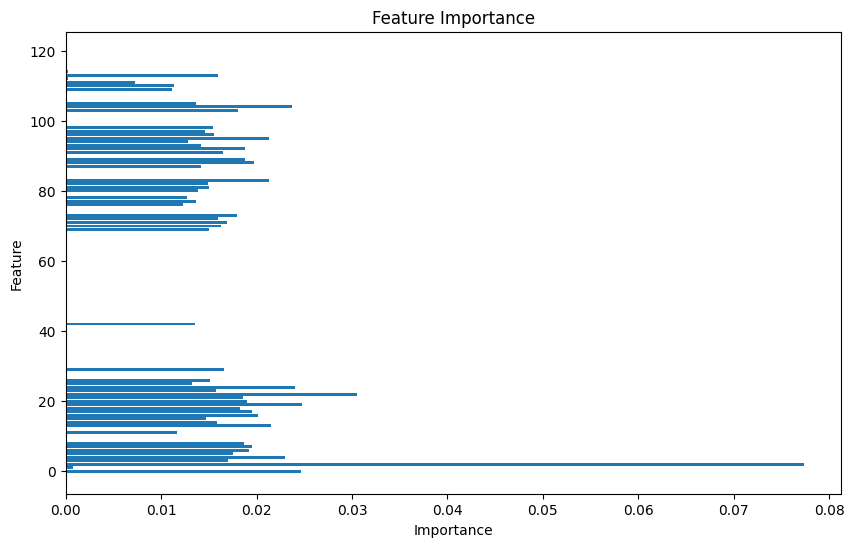

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

# Mantenha uma cópia de 'X' original
X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)

X = X_original.select_dtypes(include=['number', 'object'])
y = df['Target']  # Target

for column in X.columns:
    if X[column].dtype == 'object':
        try:
            X[column] = pd.to_numeric(X[column], errors='coerce')
        except (ValueError, TypeError):
            # Se houver um erro na conversão, você pode lidar com isso aqui
            # Por exemplo, converter para NaN
            X[column] = X[column].apply(pd.to_numeric, errors='coerce')

# Crie um imputador para preencher com a média
imputer = SimpleImputer(strategy='mean')

# Ajuste e transforme os dados
X = imputer.fit_transform(X)

# Recupere os nomes das colunas após a imputação
column_names = X_original.select_dtypes(include=['number', 'object']).columns

# Crie um DataFrame a partir da matriz NumPy
X = pd.DataFrame(X)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Acesse as importâncias das features
feature_importances = rf_model.feature_importances_

# Crie um DataFrame com as importâncias e nomes das features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordene as features por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plote um gráfico de barras das importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [63]:
feature_importance_df['Feature'] = column_names[feature_importance_df['Feature']]

print(feature_importance_df)

                                       Feature  Importance
2                           Internal_Structure    0.077335
22          diagnostics_Image-original_Maximum    0.030481
19             diagnostics_Image-original_Size    0.024808
0                                    PatientID    0.024611
24           diagnostics_Mask-original_Spacing    0.024047
..                                         ...         ...
53                    original_firstorder_Mean    0.000000
52   original_firstorder_MeanAbsoluteDeviation    0.000000
51                 original_firstorder_Maximum    0.000000
50                original_firstorder_Kurtosis    0.000000
119           original_glszm_GrayLevelVariance    0.000000

[120 rows x 2 columns]


In [64]:
feature_importance_df.to_csv('feature_importance.csv', index=False)
feature_importance = pd.read_csv('feature_importance.csv')
feature_importance_final = feature_importance[feature_importance != 0].dropna()
feature_importance_final

,Feature,Importance
0,Internal_Structure,0.077335
1,diagnostics_Image-original_Maximum,0.030481
2,diagnostics_Image-original_Size,0.024808
3,PatientID,0.024611
4,diagnostics_Mask-original_Spacing,0.024047
...,...,...
57,original_glrlm_RunPercentage,0.000197
58,original_glrlm_LowGrayLevelRunEmphasis,0.000133
59,original_gldm_SmallDependenceHighGrayLevelEmph...,0.000117
60,diagnostics_Versions_PyWavelet,0.000086


In [65]:
from sklearn.feature_selection import RFECV

# Inicialize o seletor RFE
rfe = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')

# Ajuste o seletor aos dados
rfe.fit(X, y)

# Acesse as features selecionadas
selected_features = X.columns[rfe.support_]
selected_features

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,  13,  14,  15,  16,  17,
             18,  19,  20,  21,  22,  23,  24,  69,  70,  71,  72,  82,  83,
             87,  88,  89,  91,  92,  93,  95,  96,  97, 103, 105],
           dtype='int64')

In [66]:
# Recupere os nomes das colunas originais após a imputação
column_names = X_original.select_dtypes(include=['number', 'object']).columns

# Acesse os nomes das features selecionadas
selected_column_names = column_names[selected_features]

# Imprima os nomes das features selecionadas
print(selected_column_names)

print(len(selected_column_names))

Index(['PatientID', 'Internal_Structure', 'Calcification', 'Sphericity',
       'Margin', 'Lobulation', 'Spiculation', 'Texture',
       'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
       'diagnostics_Image-original_Mean', 'diagnostics_Image-original_Minimum',
       'diagnostics_Image-original_Maximum', 'diagnostics_Mask-original_Hash',
       'diagnostics_Mask-original_Spacing', 'original_glcm_DifferenceAverage',
       'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance',
       'original_glcm_Id', 'original_glcm_MCC',
       'original_glcm_MaximumProbability', 'original_gldm_DependenceEntropy',
       'original_gldm_DependenceNonUniformity',
       'original_gldm_DependenceNonUniformityNormalized',
       'original_g

In [67]:
from sklearn.linear_model import LogisticRegression

# Inicialize o modelo de regressão logística com L1 penalty
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Ajuste o modelo aos dados
lasso_model.fit(X, y)

# Acesse os coeficientes não nulos (features selecionadas)
selected_features = X.columns[lasso_model.coef_[0] != 0]
selected_features

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,  11,  12,  13,  14,  15,
             16,  17,  18,  19,  20,  21,  22,  24,  25,  26,  29,  42,  69,
             70,  72,  73,  76,  77,  78,  83,  87,  88,  89,  91,  92,  95,
             96,  97,  98,  99, 103, 104, 105, 112, 114, 116],
           dtype='int64')

In [68]:
# Recupere os nomes das colunas originais após a imputação
column_names = X_original.select_dtypes(include=['number', 'object']).columns

# Acesse os nomes das features selecionadas
selected_column_names = column_names[selected_features]

# Imprima os nomes das features selecionadas
print(selected_column_names)

print(len(selected_column_names))

Index(['PatientID', 'Sutlety', 'Internal_Structure', 'Calcification',
       'Sphericity', 'Margin', 'Lobulation', 'Spiculation',
       'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
       'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Hash',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
       'diagnostics_Image-original_Mean', 'diagnostics_Image-original_Minimum',
       'diagnostics_Image-original_Maximum',
       'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Size',
       'diagnostics_Mask-original_BoundingBox',
       'diagnostics_Mask-original_CenterOfMassIndex',
       'original_shape_SurfaceArea', 'original_glcm_DifferenceAverage',
       'original_glcm_DifferenceEntropy', 'original_glcm_Id',
       'original_glcm_Idm', 'original_glcm_Imc1', 'o

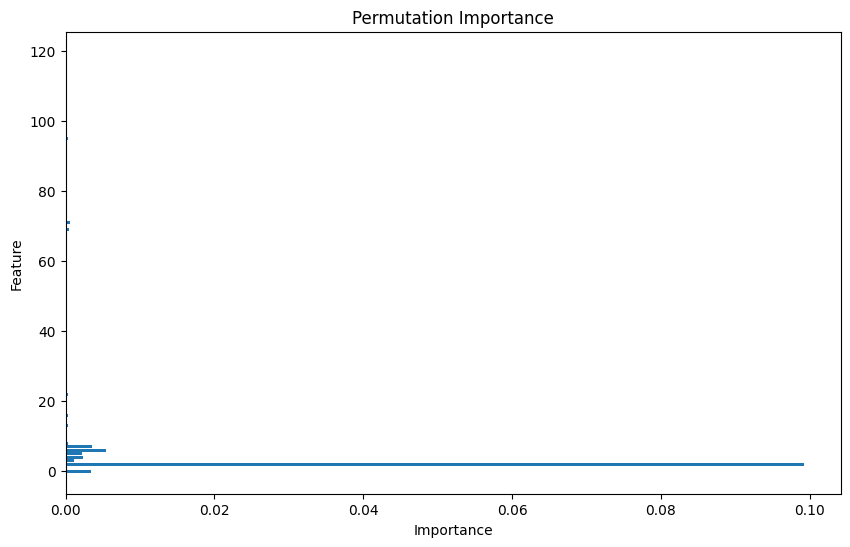

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

# Mantenha uma cópia de 'X' original
X_original = df.drop(['Target', 'Malignancy', 'Nodulo_id'], axis=1)

X = X_original.select_dtypes(include=['number', 'object'])
y = df['Target']  # Target

for column in X.columns:
    if X[column].dtype == 'object':
        try:
            X[column] = pd.to_numeric(X[column], errors='coerce')
        except (ValueError, TypeError):
            # Se houver um erro na conversão, você pode lidar com isso aqui
            # Por exemplo, converter para NaN
            X[column] = X[column].apply(pd.to_numeric, errors='coerce')

# Crie um imputador para preencher com a média
imputer = SimpleImputer(strategy='mean')

# Ajuste e transforme os dados
X = imputer.fit_transform(X)

# Recupere os nomes das colunas após a imputação
column_names = X_original.select_dtypes(include=['number', 'object']).columns

# Crie um DataFrame a partir da matriz NumPy
X = pd.DataFrame(X)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

from sklearn.inspection import permutation_importance

# Ajuste o modelo usando Permutation Importance
result = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)

# Acesse as importâncias das características
feature_importances = result.importances_mean

# Crie um DataFrame com as importâncias e nomes das características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordene as características por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plote um gráfico de barras das importâncias das características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance')
plt.show()


In [70]:
feature_importance_df['Feature'] = column_names[feature_importance_df['Feature']]

print(feature_importance_df)

                               Feature  Importance
2                   Internal_Structure    0.099208
6                           Lobulation    0.005394
7                          Spiculation    0.003584
0                            PatientID    0.003470
4                           Sphericity    0.002301
..                                 ...         ...
45    original_firstorder_10Percentile    0.000000
44          original_shape_VoxelVolume    0.000000
43   original_shape_SurfaceVolumeRatio    0.000000
42          original_shape_SurfaceArea    0.000000
119   original_glszm_GrayLevelVariance    0.000000

[120 rows x 2 columns]


In [71]:
feature_importance_df.to_csv('feature_importance.csv', index=False)
feature_importance = pd.read_csv('feature_importance.csv')
feature_importance_final = feature_importance[feature_importance != 0].dropna()
feature_importance_final

,Feature,Importance
0,Internal_Structure,0.099208
1,Lobulation,0.005394
2,Spiculation,0.003584
3,PatientID,0.003470
4,Sphericity,0.002301
5,Margin,0.002263
6,Calcification,0.001094
7,original_glcm_DifferenceVariance,0.000566
8,original_glcm_DifferenceAverage,0.000453
9,Texture,0.000377
